# Exercise 1
- 메이저리그에서 대부분의 선수들이 안타를 칠 확률이 0.2에서 0.33 사이
- 첫 경기에 나오는 선수가 3번의 시도 중 3번의 안타를 친다고 가정할 때 안타를 맞출 확률에 대한 후방 분포는?
    - 이 예제에서는 균일한 분포에서 시작하여 타율에 대한 배경 지식을 반영하는 모양이 될 때까지 가상 데이터로 업데이트하여 사전 분포를 구성

In [1]:
from scipy.stats import binom
import numpy as np
from empiricaldist import Pmf
import matplotlib.pyplot as plt

In [2]:
# 100회 타석에서 안타 구간 0.1~0.4로 설정

hypos = np.linspace(0.1, 0.4, 101)
prior = Pmf(1, hypos) # 균등 분포로 가정

In [3]:
likelihood = {
    'Y': hypos,
    'N': 1-hypos
}

In [4]:
dataset = 'Y' * 25 + 'N' * 75 # 데이터 셋을 Y 25회 N 75회로 가정

In [5]:
# prior와 likelihood를 계산하여 unnomalize 후 unnormalize를 unnmorm의 합으로 나눔
for data in dataset:
    prior *= likelihood[data]

prior.normalize()

1.3596964206970507e-23

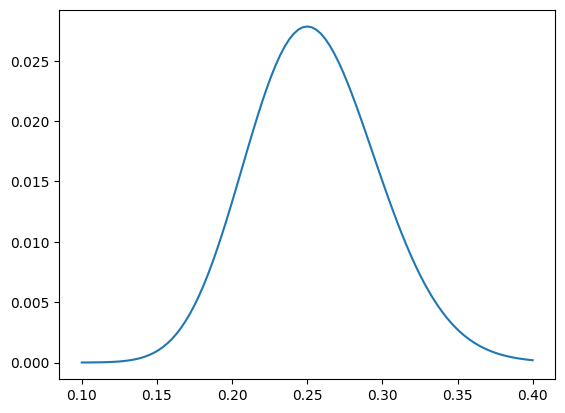

In [6]:
prior.plot(label='prior')
plt.show()

In [7]:
prior.max_prob()

0.25

In [8]:
prior[0.25]

0.027838960633692254

In [9]:
posterior = prior.copy()

for data in 'YYY':
    posterior *= likelihood[data]
    
posterior.normalize()

0.017944179687707326

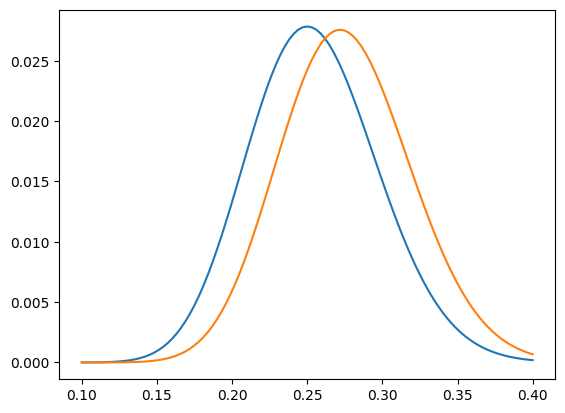

In [10]:
prior.plot(label='prior')
posterior.plot(label='posterior')
plt.show()

In [11]:
posterior.max_prob()

0.271

In [12]:
posterior[0.271]

0.027563807265634517

# Exercise 2
- 민감한 문제에 대해 사람들에게 설문조사를 할 때마다, 사회적 만족도 편견을 다루어야 하는데, 가장 긍정적인 시각에서 자신을 보여주기 위해 대답을 조정하는 경향임
    - 결과의 정확도를 향상시키는 한 가지 방법은 무작위 반응임

- 예를 들어, 얼마나 많은 사람들이 세금을 속이고 있는지 알고 싶다고 가정할 때, 직접 물어보면 일부 부정행위자가 거짓말을 할 가능성이 있음
- 다음과 같이 간접적으로 물어보면 더 정호가한 견적을 얻을 수 있음
    - 각자에게 동전을 던지라고 요청하고 결과를 공개하지 않고,
        - 만약 그들이 앞면이 나오면 Yes를 보고
        - 만약 뒷면이 나오면, "당신은 세금을 속입니까?" 라는 질문에 대답
- 만약 누군가가 Yes를 말하면, 우리는 그들이 세금을 속이는지 알 수 없음
    - 고개를 갸우뚱 했을수도 있음
- 이것을 안다면 사람들은 더 정직하게 대답할 것

- 이런 식으로 100명을 대상으로 설문조사를 하면 Yes 80, No 20을 얻을 수 있음
- 이 데이터를 바탕으로, 세금을 속이는 사람들의 비율에 대한 사후 분포는 얼마인가?
- 후방 분포에서 가장 가능성이 높은 양은 얼마인가?


In [13]:
hypos = np.linspace(0, 1, 101)
prior = Pmf(1, hypos)

In [14]:
# Yes를 말한다면 정직하게 말하는지 알 수 없기 때문에 1/2가 계산이 되어야 함
likelihood = {
    'Y': 0.5 + hypos/2, 
    'N': (1 - hypos)/2
}

In [15]:
dataset = 'Y' * 80 + 'N' * 20

In [17]:
posterior = prior.copy()

for data in dataset:
    posterior *= likelihood[data]

posterior.normalize()

3.6945139133967024e-21

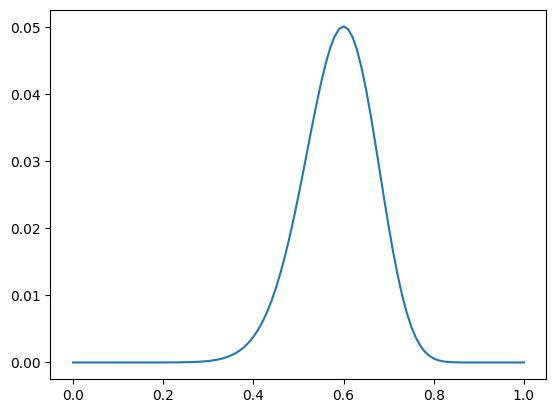

In [19]:
posterior.plot(label='80 Yes, 20 No')
plt.show()

In [20]:
posterior.idxmax()

0.6

In [21]:
posterior.max_prob()

0.6

In [22]:
posterior[0.6]

0.050146608491013614